<a href="https://colab.research.google.com/github/Bino-01/Air-Line-Passengers/blob/master/LabWK_5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating the DataFrame
air = pd.read_csv('/content/co2.csv')
air

,0
0,315.58
1,316.39
2,316.79
3,317.82
4,318.39
...,...
343,347.54
344,346.20
345,346.20
346,347.44


In [3]:
# Renaiming Columns
air.columns = ['CO2']
air

,CO2
0,315.58
1,316.39
2,316.79
3,317.82
4,318.39
...,...
343,347.54
344,346.20
345,346.20
346,347.44


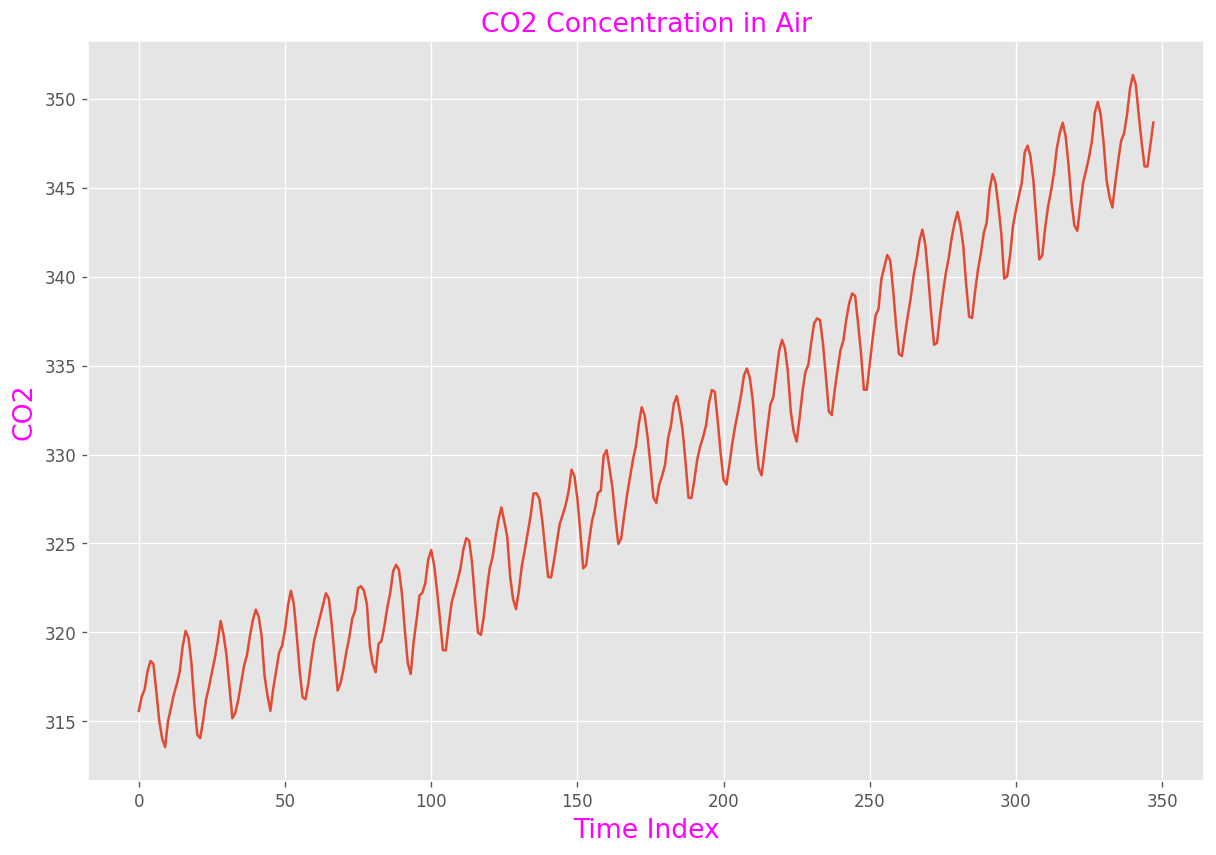

In [4]:
# Plotting the Air Pollution TS
plt.style.use('ggplot')
plt.figure(figsize = (12,8), dpi = 120)
plt.xlabel('Time Index', color = 'magenta', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize': 16})
plt.ylabel('CO2', color = 'magenta', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize': 16})
plt.title('CO2 Concentration in Air', color = 'magenta', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize': 16})

plt.plot(air)
plt.show()

In [5]:
# Let's run the Augmented Dickey Fuller Test (ADF_Test) and the Kwaitkowski-Phillips-Schmidt-Shin Test (KPSS_Test)
from statsmodels.tsa.stattools import adfuller, kpss
adf_test = adfuller(air['CO2'])
print('ADF Test: p-value = %f'  %adf_test[1]) # Based on the result, ADF p-value > 0.05 ===> TS non-stationary

kpss_test = kpss(air['CO2'])
print('KPSS Test: p-value = %f' %kpss_test[1]) # Based on the result, KPSS p-value < 0.05 ===> TS non-stationary

# Therefore we need to carry out some steps of transformation in order for the TS to become stationary ====> ARIMA modelling

ADF Test: p-value = 1.000000
KPSS Test: p-value = 0.010000


/tmp/ipython-input-1974524251.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(air['CO2'])


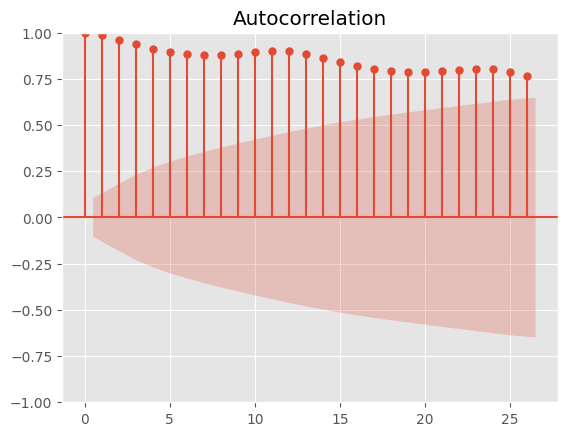

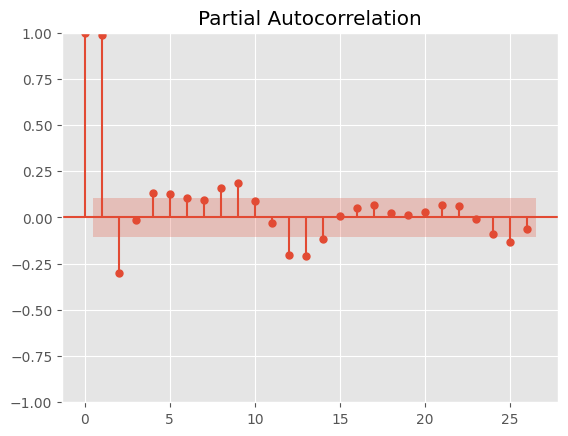

'\n1- From the autocorrelation plot, we can see that there is many signicant lags, therefore we will select from the value of q = 0, 1, 2, 3, ...\n2- From the partial autocorrelation plot, we can see that there is many signicant lags, therefore we will select from the value of p = 0, 1, 2, 3, ...\nThgererfore, the foloowing combination of ARIMA can be created: ARIMA(0,d,0) - ARIMA(0,d,1) - ARIMA(0,d,2) - ARIMA(0,d,3) - ARIMA(1,d,0) - ARIMA(1,d,1) - ARIMA(1,d,2) - ARIMA(1,d,3), ....\n\n'

In [6]:
# Defining the values related to ARIMA model (p,d,q) - For that, we will use/plot the ACF and the PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(air), plot_pacf(air)
plt.show()

"""
1- From the autocorrelation plot, we can see that there is many signicant lags, therefore we will select from the value of q = 0, 1, 2, 3, ...
2- From the partial autocorrelation plot, we can see that there is many signicant lags, therefore we will select from the value of p = 0, 1, 2, 3, ...
Thgererfore, the foloowing combination of ARIMA can be created: ARIMA(0,d,0) - ARIMA(0,d,1) - ARIMA(0,d,2) - ARIMA(0,d,3) - ARIMA(1,d,0) - ARIMA(1,d,1) - ARIMA(1,d,2) - ARIMA(1,d,3), ....

"""


'\nAnalysing the differencing plots, the 1st order differencing seems to be enough to make the TS stationary., therefore d=1.\n\nWe will have the following ARIMA model:\nARIMA(1,1,0) - ARIMA(0,1,1) v - ARIMA(0,1,2) - ARIMA(0,1,3) - ARIMA(1,1,1) - ARIMA(1,1,) - ARIMA(1,1,3)\n'

<Figure size 1440x960 with 0 Axes>

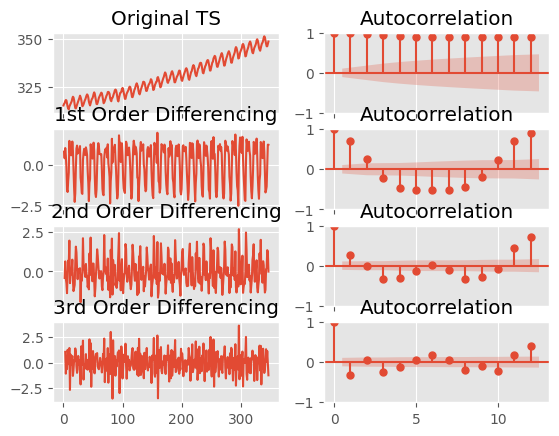

In [7]:
# Let's Implementing the Differencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the Original TS
plt.figure(figsize = (12,8), dpi = 120)
fig,axes = plt.subplots(4,2, sharex = 'col')
axes[0,0].plot(air); axes[0,0].set_title('Original TS')
plot_acf(air, lags = 12, ax = axes[0,1])

# Plotting the 1st Order Differencing
axes[1,0].plot(air.diff()); axes[1,0].set_title('1st Order Differencing')
plot_acf(air.diff().dropna(), lags = 12, ax = axes[1,1])

# Plotting the 2nd Order Differencing
axes[2,0].plot(air.diff().diff()); axes[2,0].set_title('2nd Order Differencing')
plot_acf(air.diff().diff().dropna(), lags = 12, ax = axes[2,1])

# Plotting the 3rd Order Differencing
axes[3,0].plot(air.diff().diff().diff()); axes[3,0].set_title('3rd Order Differencing')
plot_acf(air.diff().diff().diff().dropna(), lags = 12, ax = axes[3,1])

"""
Analysing the differencing plots, the 1st order differencing seems to be enough to make the TS stationary., therefore d=1.

We will have the following ARIMA model:
ARIMA(1,1,0) - ARIMA(0,1,1) v - ARIMA(0,1,2) - ARIMA(0,1,3) - ARIMA(1,1,1) - ARIMA(1,1,) - ARIMA(1,1,3)
"""

In [8]:
# Let' Create Different ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(air, order = (0,1,1))
model_fit = model.fit()
model_fit.summary()

"""
1- Based on the ARIMA models built the ones that have lower values of Akaike Information Criterion (AIC), good to assess predictive and
Bayesian Information Criterion (BIC) good to assess the model complexity, and the smaller the best.
2- Akaike Information Criterion (AIC) allows to know whether the model fit the dataset / If the model good at prediction / forecasting, because it can deal effectively with unseen dataset.
3- Bayesian Information Criterion (BIC) allows to know whether the model deal with complexity, meaning many variables.
4- Hannan - Quinn - Schmidt - Shin (HQSS) allows to swelect between different models.
The smaller the values of these three metrics the better the ARIMA model.
"""

'\n1- Based on the ARIMA models built the ones that have lower values of Akaike Information Criterion (AIC), good to assess predictive and\nBayesian Information Criterion (BIC) good to assess the model complexity, and the smaller the best.\n2- Akaike Information Criterion (AIC) allows to know whether the model fit the dataset / If the model good at prediction / forecasting, because it can deal effectively with unseen dataset.\n3- Bayesian Information Criterion (BIC) allows to know whether the model deal with complexity, meaning many variables.\n4- Hannan - Quinn - Schmidt - Shin (HQSS) allows to swelect between different models.\nThe smaller the values of these three metrics the better the ARIMA model.\n'

In [9]:
# 2 nd ARIMA model
model = ARIMA(air, order = (1,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  348
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -427.101
Date:                Thu, 22 Jan 2026   AIC                            858.201
Time:                        13:22:22   BIC                            865.900
Sample:                             0   HQIC                           861.266
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7059      0.043     16.558      0.000       0.622       0.789
sigma2         0.6851      0.063     10.813      0.000       0.561       0.809
===================================================================================
Ljung-Box (L1) (Q):                  42.16   Jarque-Bera (JB):                 5.79
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               1.13   Skew:                             0.16
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# 3rd ARIMA Model
model = ARIMA(air, order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  348
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -403.784
Date:                Thu, 22 Jan 2026   AIC                            813.568
Time:                        13:22:22   BIC                            825.116
Sample:                             0   HQIC                           818.166
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5730      0.060      9.482      0.000       0.455       0.691
ma.L1          0.3545      0.067      5.287      0.000       0.223       0.486
sigma2         0.5986      0.052     11.436      0.000       0.496       0.701
===================================================================================
Ljung-Box (L1) (Q):                   2.38   Jarque-Bera (JB):                 3.91
Prob(Q):                              0.12   Prob(JB):                         0.14
Heteroskedasticity (H):               1.04   Skew:                             0.20
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
# 4th ARIMA model
model = ARIMA(air, order = (2,1,1))
model_fit = model.fit()
model_fit.summary()

"""
From the the four models created the ARIMA (2,1,1) is the best because of the smallest values of AIC, BIC, and HQIC.
At the same time we have to consider the p-values that should be < 0.05, for the values to be statistically significant.
"""

'\nFrom the the four models created the ARIMA (2,1,1) is the best because of the smallest values of AIC, BIC, and HQIC.\nAt the same time we have to consider the p-values that should be < 0.05, for the values to be statistically significant.\n'

In [12]:
# Creating a comparison method of several ARIMAs
from statsmodels.tsa.arima.model import ARIMA

orders = [(0,1,0), (0,1,1), (0,1,2), (0,1,3), (1,1,0), (1,1,1), (1,1,2), (1,1,3), (2,1,0), (2,1,1), (2,1,3)]

for order in orders:
  try:
    model = ARIMA(air, order = order)
    fit = model.fit()
    print(f'ARIMA{order}: AIC ={fit.aic:.3f}, BIC={fit.bic:.3f}, HQIC={fit.hqic:.3f}')
  except Exception as e:
    print(f'ARIMA{order}: {e}')
"""
From this analysis, we can conclude that the best ARIMA model is ARIMA(2,1,1) with the smallest values of AIC, BIC, and HQIC.
"""

ARIMA(0, 1, 0): AIC =1095.244, BIC=1099.094, HQIC=1096.777
ARIMA(0, 1, 1): AIC =889.839, BIC=897.538, HQIC=892.905
ARIMA(0, 1, 2): AIC =796.503, BIC=808.051, HQIC=801.101
ARIMA(0, 1, 3): AIC =757.361, BIC=772.758, HQIC=763.491
ARIMA(1, 1, 0): AIC =858.201, BIC=865.900, HQIC=861.266
ARIMA(1, 1, 1): AIC =813.568, BIC=825.116, HQIC=818.166
ARIMA(1, 1, 2): AIC =777.046, BIC=792.443, HQIC=783.176
ARIMA(1, 1, 3): AIC =759.257, BIC=778.504, HQIC=766.920
ARIMA(2, 1, 0): AIC =764.279, BIC=775.827, HQIC=768.877
ARIMA(2, 1, 1): AIC =679.967, BIC=695.364, HQIC=686.098
ARIMA(2, 1, 3): AIC =682.850, BIC=705.946, HQIC=692.046


'\nFrom this analysis, we can conclude that the best ARIMA model is ARIMA(2,1,1) with the smallest values of AIC, BIC, and HQIC.\n'

In [13]:
# Let's Predict with this best ARIMA (2,1,1) - Working on the Dataset

tot = len(air)
win = 12
diff = tot-win
train, test = air[:diff], air[diff:]


In [14]:
# Splitting the dataset
tot = len(air)
num_obs_ahead = 12
diff = tot-num_obs_ahead
train, test = air[:diff], air[diff:]

In [36]:
# Determination of values for plotting
# Let's use the best ARIMA for prediction/forecasting
model = ARIMA(train, order = (3,1,2))
fit = model.fit()

# Predicting the Values
forecast = fit.forecast(steps = num_obs_ahead, alpha = .15)
forins = fit.get_forecast(steps = num_obs_ahead).summary_frame()

# Defining Upper bound and Lower bound
forecast_val = pd.Series(forecast, index = test.index)
lower_bound = pd.Series(forins['mean_ci_lower'], index = test.index)
upper_bound = pd.Series(forins['mean_ci_upper'], index = test.index)



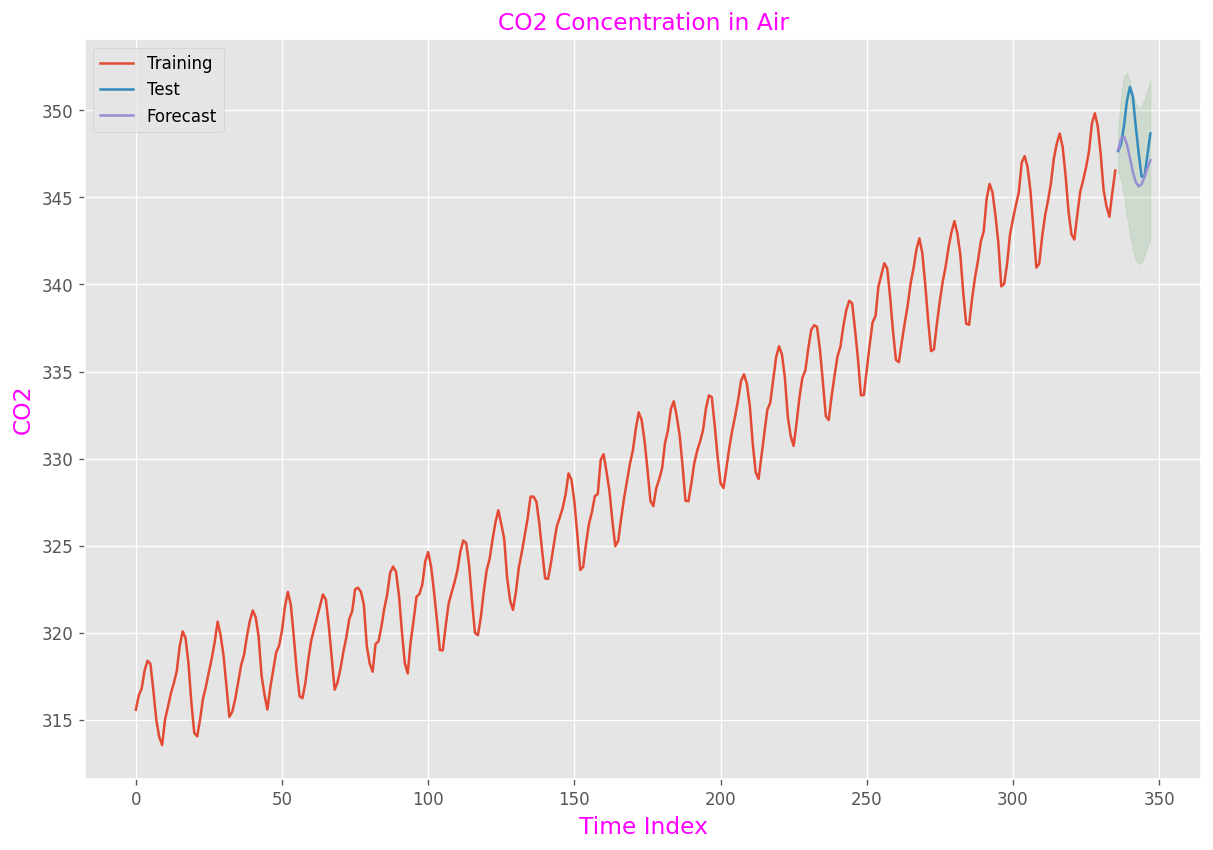

In [37]:
# Plotting Predicting / Forecasted Values
plt.style.use('ggplot')
plt.figure(figsize = (12,8), dpi = 120)
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(forecast_val, label = 'Forecast')
plt.xlabel('Time Index', color = 'magenta', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize': 14})
plt.ylabel('CO2', color = 'magenta', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize': 14})
plt.title('CO2 Concentration in Air', color = 'magenta', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize': 14})
plt.fill_between(lower_bound.index, lower_bound, upper_bound, color = 'g', alpha = .1)
plt.legend(loc ='best')
plt.show()

In [38]:
# Errore Calculation / Accuracy Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse = mean_squared_error(test, forecast_val)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast_val)
mape = mean_absolute_percentage_error(test, forecast_val)
r2 = r2_score(test, forecast_val)

print(f'MSE = {mse:.3f}')
print(f'RMSE = {rmse:.3f}')
print(f'MAE = {mae:.3f}')
print(f'MAPE = {mape:.3f}')
print(f'R2 = {r2:.3f}')


MSE = 4.918
RMSE = 2.218
MAE = 1.650
MAPE = 0.005
R2 = -0.856


In [ ]:
# ARIMA doesn't deal adequately with seasonality, therefore let's create seasonal ARIMA = SARIMA(p,d,q)X(P,D,Q,m)
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(air, order = (2,1,2), seasonal_order = (2,1,2,12))
model_fit = model.fit()
model_fit.summary()



'\nThe values of AIC, BIC, HQIC are lower for the SARIMA model than for the ARIMA model.\nThrefore, SARIMA models is better than the corresponding ARIMA.\n\n\n'

In [ ]:
#

In [35]:
# Comparison between Several ARIMAs Based Accuracy
"""
1) ARIMA(2,1,1)
MSE = 5.051
RMSE = 2.248
MAE = 1.666
MAPE = 0.005
R2 = -0.90

2) ARIMA(3,1,2)

MSE = 4.918
RMSE = 2.218
MAE = 1.650
MAPE = 0.005
R2 = -0.856

NB: The smaller the errors the better the madel can forecast
    R2 (r sqrt) is negative meaning that the model is not goodat explaining the variabilities within the Dataset

"""

'\n1) ARIMA(2,1,1)\n\n\n'

In [42]:
# ARIMA doesn't deal adequately with seasonality, therefore let's create seasonal ARIMA = SARIMA(p,d,q)X(P,D,Q,m)
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(air, order = (3,1,2), seasonal_order = (3,1,2,12))
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                CO2   No. Observations:                  348
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood                 -61.357
Date:                            Thu, 22 Jan 2026   AIC                            144.714
Time:                                    15:56:17   BIC                            186.670
Sample:                                         0   HQIC                           161.441
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2516      0.223      5.606      0.000       0.814       1.689
ar.L2         -0.3143      0.145     -2.163      0.031      -0.599      -0.030
ar.L3         -0.2219      0.066     -3.339      0.001      -0.352      -0.092
ma.L1         -1.5987      0.213     -7.519      0.000      -2.015      -1.182
ma.L2          0.7528      0.181      4.149      0.000       0.397       1.108
ar.S.L12      -0.5179      1.530     -0.338      0.735      -3.517       2.481
ar.S.L24      -0.0595      0.085     -0.697      0.486      -0.227       0.108
ar.S.L36      -0.0563      0.084     -0.666      0.505      -0.222       0.109
ma.S.L12      -0.3551      1.521     -0.233      0.815      -3.336       2.626
ma.S.L24      -0.4488      1.350     -0.332      0.740      -3.095       2.197
sigma2         0.0800      0.007     12.016      0.000       0.067       0.093
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.98
Prob(Q):                              0.88   Prob(JB):                         0.61
Heteroskedasticity (H):               0.94   Skew:                             0.02
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Comparing SARIMA models
"""
1) SARIMA(2,1,1)X(2,1,1,12)
AIC	141.522
BIC	168.221
HQIC	152.166

2)	SARIMA(3,1,2)X(3,1,2,12)

AIC	144.714
BIC	186.670
HQIC	161.44
"""

In [29]:
# Let's carry out Error Calculation / Accuracy Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse = mean_squared_error(test, forecast_val)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast_val)
mape = mean_absolute_percentage_error(test, forecast_val)
r2 = r2_score(test, forecast_val)

print(f'MSE = {mse:.3f}')
print(f'RMSE = {rmse:.3f}')
print(f'MAE = {mae:.3f}')
print(f'MAPE = {mape:.3f}')
print(f'R2 = {r2:.3f}')

MSE = 6.037
RMSE = 2.457
MAE = 1.880
MAPE = 0.005
R2 = -1.278


In [ ]:
# Comparing ARIMAs
"""
1) ARIMA(2,1,1)
MSE = 5.051
RMSE = 2.248
MAE = 1.666
MAPE = 0.005
R2 = -0.906

2) ARIMA(3,1,3)

MSE = 6.037
RMSE = 2.457
MAE = 1.880
MAPE = 0.005
R2 = -1.278

"""

In [31]:
# ARIMA is not good at dealing with seasonalities, therefore we will used the seasonal ARIMA = SARIMA
# Fitting a SARIMA model SARIMA(p,d,q)X(P,D,Q,m)
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(air, order = (2,1,1), seasonal_order = (2,1,1,12))
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                CO2   No. Observations:                  348
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 -63.761
Date:                            Thu, 22 Jan 2026   AIC                            141.522
Time:                                    14:46:13   BIC                            168.221
Sample:                                         0   HQIC                           152.166
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4509      0.125      3.622      0.000       0.207       0.695
ar.L2          0.1339      0.081      1.661      0.097      -0.024       0.292
ma.L1         -0.8042      0.118     -6.810      0.000      -1.036      -0.573
ar.S.L12       0.0101      0.064      0.158      0.875      -0.115       0.136
ar.S.L24      -0.0511      0.066     -0.779      0.436      -0.180       0.077
ma.S.L12      -0.8528      0.049    -17.539      0.000      -0.948      -0.758
sigma2         0.0815      0.007     11.850      0.000       0.068       0.095
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.28
Prob(Q):                              0.97   Prob(JB):                         0.53
Heteroskedasticity (H):               0.91   Skew:                             0.01
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""